In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Exploratory Data Analysis

In [97]:
df = pd.read_csv('insurance.csv')
df.columns = df.columns.str.strip()

In [98]:
df.shape

(1338, 7)

Note : 1338 rows and 7 columns

In [99]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Note : 2 integers / 2 floats / 3 string type

To do : Encode the strings if Needed

In [100]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Note : 

Data present are between 18 and 64 years of age. 


In [102]:
df.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Note : No missing values to be dealth with

## Univariative Analysis

<AxesSubplot:xlabel='charges', ylabel='Count'>

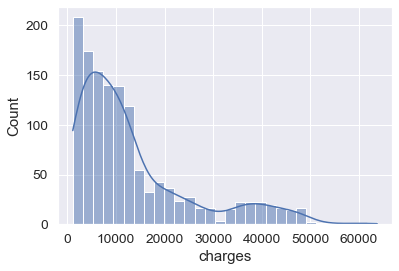

In [103]:
sns.set_style('darkgrid')
sns.histplot(data=df['charges'],kde=True)
# sns.histplot(data=df['charges'],kde=True,cumulative=True)

Note : The data is right skewed.

<AxesSubplot:xlabel='charges', ylabel='Count'>

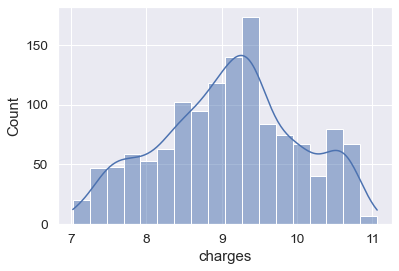

In [104]:
df_log = pd.DataFrame()
df_log['charges'] = np.log(df['charges'])
sns.histplot(data=df_log['charges'],kde=True)

<AxesSubplot:>

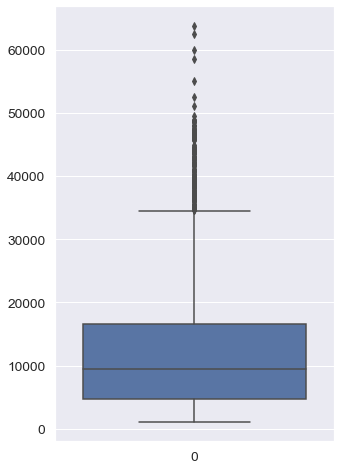

In [105]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df['charges'])

Note : Outliers are present.

### Outlier imputation with IQR

In [106]:
#Finding out the lower and upper range

quartile1 = np.quantile(df['charges'],0.25)
quartile3 = np.quantile(df['charges'],0.75)
iqr = quartile3 - quartile1

lowerRange = quartile1 - quartile1*1.5
upperRange = quartile3 + quartile3*1.5

In [107]:
#Replacing outliers with ranges respectively
df["charges"] = np.where(df["charges"] > upperRange, upperRange,df['charges'])
df['charges'] = np.where(df['charges'] < lowerRange,lowerRange,df['charges'])

## Multivariate Analysis

<AxesSubplot:xlabel='bmi', ylabel='Count'>

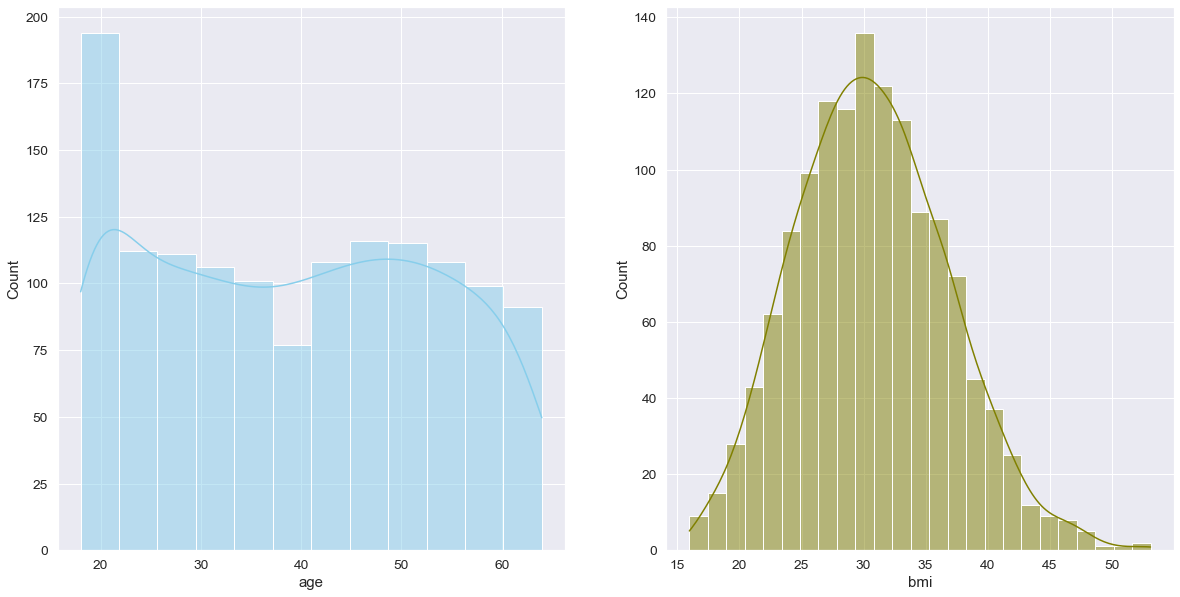

In [108]:
#Plotting Histograms for Continuous Variables 

# df.hist(figsize=(10,10))

fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="bmi", kde=True, color="olive", ax=axs[1])
# sns.histplot(data=df, x="children", kde=True, color="gold", ax=axs[1, 0])

# df = df.drop(['sex', 'smoker','region'], axis=1)

# col = 0
# for i in range(0,2):
#     col+=1
#     for j in range(0,2):
#         sns.histplot(data=df.loc[col],kde=True, color="teal", ax=axs[i, j],legend=True)

<AxesSubplot:xlabel='children', ylabel='count'>

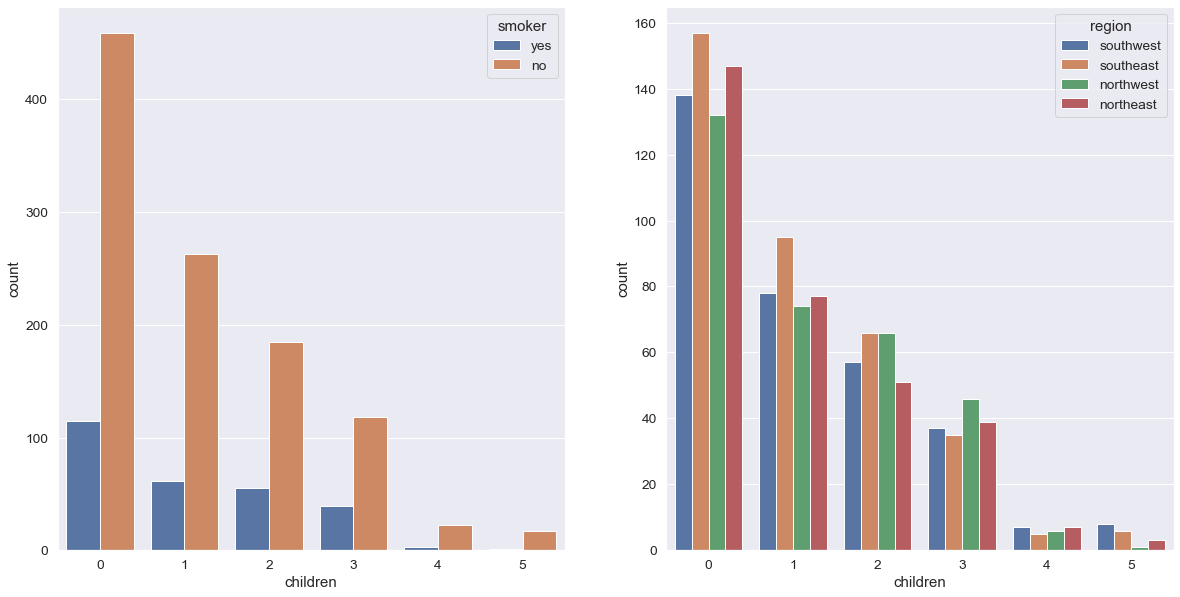

In [109]:
# Countplotfor discrete variable
sns.set(font_scale=1.25)
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(data=df,x='children',hue='smoker',ax=axs[0])
sns.countplot(data=df,x='children',hue='region',ax=axs[1])

Note : Most of the subjects have no children

<AxesSubplot:xlabel='bmi'>

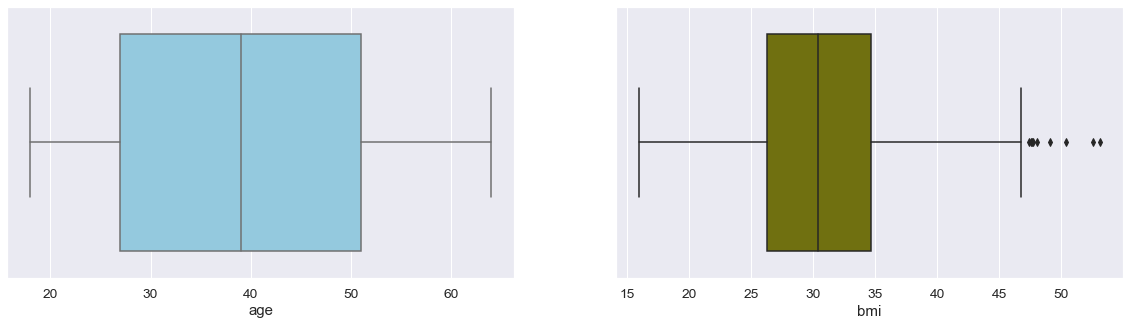

In [110]:
# Boxplots to Check outliers

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df,x="age", ax=axs[0],color="skyblue")
sns.boxplot(data=df,x="bmi", ax=axs[1],color="olive")


Note: We can impute outliers for 'bmi' and make 'charges' feature normalize by using logarithms. But we will do this on a latter stage.

In [111]:
#Finding out the lower and upper range

quartile1 = np.quantile(df['bmi'],0.25)
quartile3 = np.quantile(df['bmi'],0.75)
iqr = quartile3 - quartile1

lowerRange = quartile1 - quartile1*1.5
upperRange = quartile3 + quartile3*1.5

In [112]:
#Replacing outliers with ranges respectively
df["charges"] = np.where(df["charges"] > upperRange, upperRange,df['charges'])
df['charges'] = np.where(df['charges'] < lowerRange,lowerRange,df['charges'])

<AxesSubplot:xlabel='bmi'>

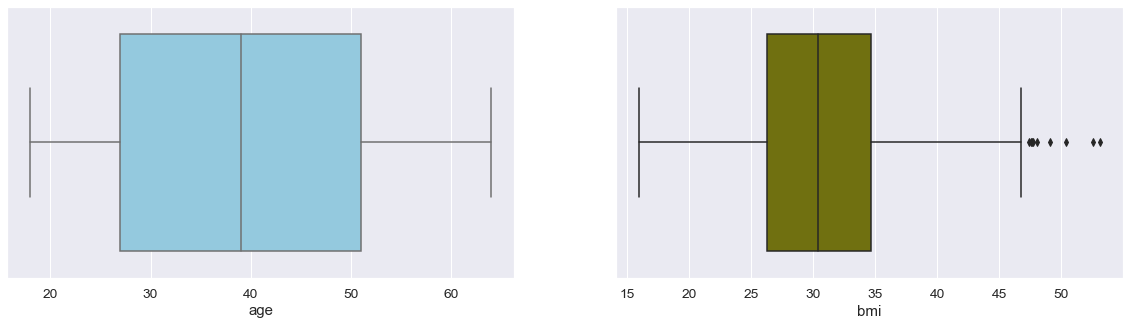

In [113]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

sns.boxplot(data=df,x="age", ax=axs[0],color="skyblue")
sns.boxplot(data=df,x="bmi", ax=axs[1],color="olive")

Note : No changes were done for outliers as they fall within the lowerbound and upperbound ranges

# Fitting the Model 

### Using Categorical and Continuous Data together and Fit Model


Categorical Data -> Onehot Encoder

Continuous Data -> StandardScaler

In [129]:
# Split Target and Predictor variables 

X = df.drop("charges",axis=1)
y = df_log["charges"]

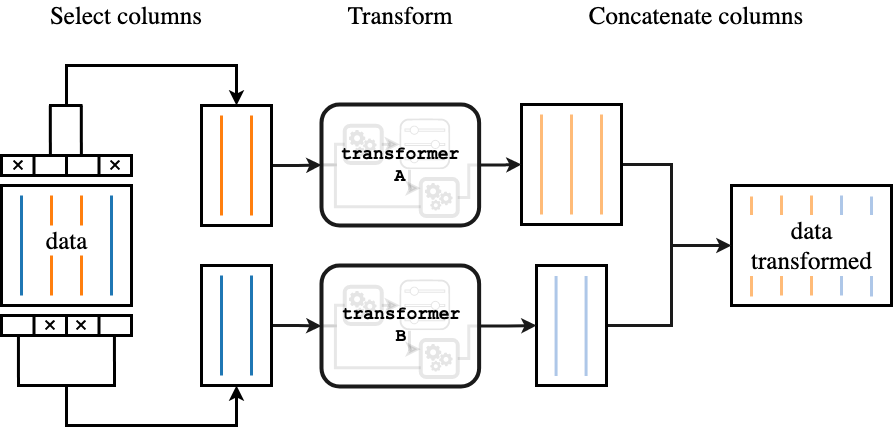

In [130]:
#Seperating the Categorical and Numerical Columns
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [131]:
#Instantiating preprocessors
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore") #handle_unknown="ignore" to solve the potential issues due to rare categories.
numerical_preprocessor = StandardScaler()

In [132]:
#Transforming the columns using preprocessors
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [133]:
#Create Pipeline with the Machine Learning Model

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LinearRegression())

In [134]:
#Displaying Pipeline

from sklearn import set_config
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'smoker', 'region']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('linearregression', LinearRegression())])

### Splitting the Data for Testing and Training

In [138]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [139]:
_ = model.fit(X_train,y_train)

In [146]:
Summary(model.fit(X_train,y_train))

NameError: name 'Summary' is not defined

In [140]:
model.predict(X_test)

array([ 8.08203125,  9.29296875,  9.07714844,  9.36230469,  7.97070312,
       10.29492188,  9.1953125 ,  9.32617188,  8.23925781, 10.08789062,
        9.28125   ,  9.58398438,  8.79101562,  8.84667969,  7.93457031,
        9.0703125 ,  8.37109375,  8.78417969,  9.50683594,  9.4765625 ,
        9.17089844, 10.31054688,  8.95996094,  8.90136719,  8.08105469,
        8.80957031,  9.0703125 ,  9.00390625,  8.69433594,  8.33105469,
        9.40722656,  8.56152344, 10.97070312,  9.58105469, 10.72851562,
        9.05957031,  9.90332031,  9.84570312,  9.41503906, 10.60546875,
        8.51953125,  9.36523438,  9.27441406,  9.43847656,  8.5       ,
        9.37402344,  8.10644531,  9.77636719,  8.99316406,  9.734375  ,
        9.32617188,  9.3828125 ,  8.08496094,  9.08789062,  9.59960938,
        8.62109375, 10.65527344,  9.4375    ,  8.35351562,  8.05273438,
        8.40136719,  9.47460938,  9.74511719,  8.20019531,  9.48828125,
        9.09570312,  9.26757812,  9.26757812,  8.11035156,  9.69

In [141]:
round(model.score(X_test, y_test),2)*100

78.0

Note : Accuracy improved by 4% after removing the skewness of predictor variable by logarithm transformation (74% -> 78%)

Note : Further, we need to do a Forward/Backward feature selection